In [1]:
import sympy
from sympy import Eq, S, Matrix, symbols, Symbol, simplify, expand, collect, solve, solveset, zeros, ones
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy.plotting.plot import plot3d
import matplotlib.pyplot as plt
from IPython.display import Math, Latex

from sympy import latex, plot_implicit

# Практическое занятие 17
# Компьютерный практикум по алгебре на Python
## Поверхности второго порядка
### Задание 1.
Составить в матричном виде двумя способами уравнение поверхности второго порядка $4x^2-24xy+8\sqrt3 xz-7y^2+10\sqrt3 yz+3z^2-4 = 0$. Привести уравнение поверхности второго порядка к каноническому виду с помощью перехода к новому базису. Вывести на экран каноническое уравнение.

In [2]:
x, y, z = symbols('x y z')
A = Matrix(((4, -12, 4*sympy.sqrt(3)), (-12, -7, 5*sympy.sqrt(3)), (4*sympy.sqrt(3), 5*sympy.sqrt(3), 3)))
b = Matrix((0, 0, 0)).T
c = -4
X = Matrix((x, y, z))
u = X.T * A * X
v = b * X
display(Latex(f'A = {latex(A)},\ X^TAX = {latex(u)},\ bX = {latex(v)}'))
eq1_1 = (u[0] + 2 * v[0] + c).expand().simplify()
display(Latex(f'Уравнение\ поверхности:\ {latex(Eq(eq1_1, 0))}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [3]:
A1 = A.row_join(b.T).col_join(b.row_join(Matrix((c,)))) # (c,) - tuple, состоящий из одного элемента
display(Latex(f'A_1 = {latex(A1)}'))
X1 = X.col_join(Matrix((1,)))
eq1_2 = (X1.T * A1 * X1)[0].expand().simplify()
display(Latex(f'Уравнение\ поверхности:\ {latex(Eq(eq1_2, 0))}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [4]:
P = Matrix([])
for item in A.eigenvects():
    degree = item[1]
    for i in range(degree):
        P = P.row_join(item[2][i].normalized()) 
A = P.T*A*P
x1, y1, z1 = symbols('x1 y1 z1')
X_new = Matrix((x1, y1, z1))
q_f1 = (X_new.T * A * X_new)[0].expand().simplify()
display(Latex(f'A_{{new}} = {latex(A)},\ квадратичная\ форма:\ {latex(q_f1)}'))

<IPython.core.display.Latex object>

In [5]:
Eq(q_f1, 4)

Eq(-20*x1**2 + 8*y1**2 + 12*z1**2, 4)

In [6]:
eq1 = Eq(q_f1 / 4, 1)
display(eq1)

Eq(-5*x1**2 + 2*y1**2 + 3*z1**2, 1)

### Задание 2.
Привести уравнение поверхности второго порядка $24 x^{2} - 4 \sqrt{2} x y - 4 \sqrt{2} x z + 18 y^{2} + 12 y z + 18 z^{2} - 4 = 0$ к каноническому виду. Построить график.

In [7]:
A2 = Matrix(((24, -2*sympy.sqrt(2), -2*sympy.sqrt(2)), (-2*sympy.sqrt(2), 18, 6), (-2*sympy.sqrt(2), 6, 18)))
X = Matrix((x, y, z))
eq2 = Eq((X.T * A2 * X)[0].expand().simplify() - 4, 0)
display(Latex(f'A = {latex(A2)},\ уравнение\ поверхности:\ {latex(eq2)}'))
P = Matrix([])
for item in A2.eigenvects():
    degree = item[1]
    for i in range(degree):
        P = P.row_join(item[2][i].normalized()) 
A2 = P.T*A2*P
x1, y1, z1 = symbols('x1 y1 z1')
X_new = Matrix((x1, y1, z1))
q_f2 = (X_new.T * A2 * X_new)[0].expand().simplify()
display(Latex(f'A_{{new}} = {latex(A2)},\ квадратичная\ форма:\ {latex(q_f2)}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [8]:
Eq(q_f2, 4)

Eq(12*x1**2 + 20*y1**2 + 28*z1**2, 4)

In [9]:
eq2 = Eq(q_f2 / 4, 1)
display(eq2)

Eq(3*x1**2 + 5*y1**2 + 7*z1**2, 1)

-sqrt(-21*x1**2 - 35*y1**2 + 7)/7

sqrt(-21*x1**2 - 35*y1**2 + 7)/7

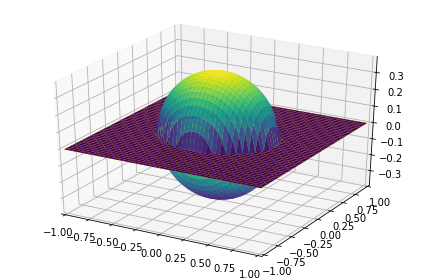

In [10]:
Z = solve(eq2, z1) 
display(*Z)
plot3d(*Z, (x1, -1, 1), (y1, -1, 1))

### Задание 3.
Привести уравнение поверхности второго порядка $x^2 + y^2 + 2x - 4y + 2z + 1 = 0$ к каноническому виду. Построить график.

In [11]:
A3 = Matrix(((1, 0, 0), (0, 1, 0), (0, 0 , 0)))
X3 = Matrix((x, y, z))
eq_f3 = (X3.T * A3 * X3)[0].expand().simplify()
display(Latex(f'A = {latex(A3)},\ квадратичная\ форма:\ {latex(eq_f3)}'))

<IPython.core.display.Latex object>

In [12]:
b = Matrix((0, 0, 1))
b

Matrix([
[0],
[0],
[1]])

In [13]:
u_new = eq_f3 + 2* (b.T * X3)[0]
display(u_new)

x**2 + y**2 + 2*z

In [14]:
c_new = 1
for i in range(2):
    c_new -= b[i] ** 2 / (A3[i, i])
display(c_new)   

1

In [15]:
x2, y2, z2 = symbols('x2 y2 z2')
X3_last = Matrix((x2, y2, z2))
eq3=Eq((X3_last.T * A3 * X3_last)[0] + 2*(X3_last.T*b)[0] , 0)
eq3

Eq(x2**2 + y2**2 + 2*z2, 0)

-x2**2/2 - y2**2/2

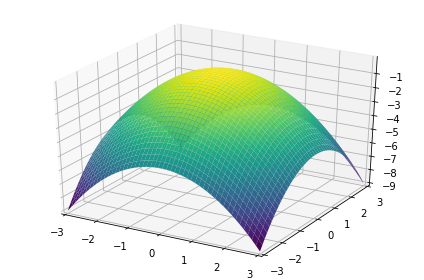

In [16]:
Z = solve(eq3, z2) 
display(*Z)
plot3d(*Z, (x2, -3, 3), (y2, -3, 3))

### Индивидуальное задание.
Привести уравнение поверхности второго порядка к каноническому виду. Построить график.

$$6148 x^{2} + 40 \sqrt{6} x y + 408 \sqrt{6} x z + 2550 y^{2} - 480 y z + 3802 z^{2} - 3750 = 0$$

In [17]:
A = Matrix(((6148, 20*sympy.sqrt(6), 204*sympy.sqrt(6)),
            (20*sympy.sqrt(6), 2550, -240), 
            (204*sympy.sqrt(6), -240, 3802)))
X = Matrix((x, y, z))
eq = Eq((X.T * A * X)[0].expand().simplify() - 3750, 0)
display(Latex(f'A = {latex(A)},\ уравнение\ поверхности:\ {latex(eq)}'))
P = Matrix([])
for item in A.eigenvects():
    degree = item[1]
    for i in range(degree):
        P = P.row_join(item[2][i].normalized()) 
A = P.T*A*P
x1, y1, z1 = symbols('x1 y1 z1')
X_new = Matrix((x1, y1, z1))
q_f = (X_new.T * A * X_new)[0].expand().simplify()
display(Latex(f'A_{{new}} = {latex(A)},\ квадратичная\ форма:\ {latex(q_f)}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [18]:
Eq(q_f, 3750)

Eq(2500*x1**2 + 3750*y1**2 + 6250*z1**2, 3750)

In [19]:
eq = Eq(q_f / 3750, 1)
display(eq)

Eq(2*x1**2/3 + y1**2 + 5*z1**2/3, 1)

-sqrt(-10*x1**2 - 15*y1**2 + 15)/5

sqrt(-10*x1**2 - 15*y1**2 + 15)/5

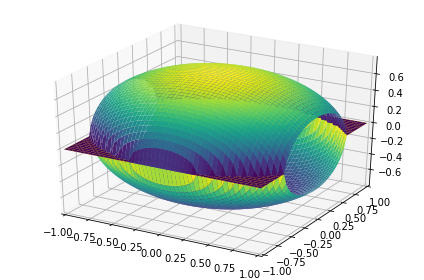

In [20]:
Z = solve(eq, z1) 
display(*Z)
plot3d(*Z, (x1, -1, 1), (y1, -1, 1))

Хорасанджян Левон, вариант №157